# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [20]:
import pandas as pd
import numpy as np

In [69]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [22]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 1


52: video_0065.mp4
https://youtu.be/taNLnQg_x5E


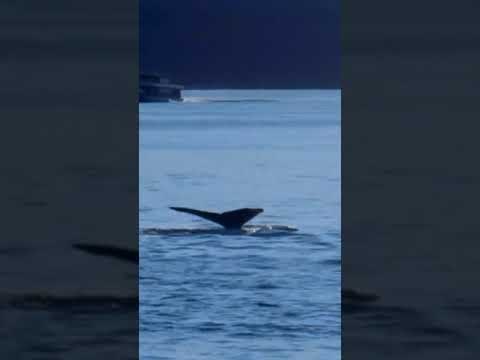

Clip Start Time:  0:02
Clip End Time:    0:17


Done annotating videos 52 to 52 



In [123]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [124]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
49,AOF_BMnslF4,https://youtu.be/AOF_BMnslF4,"Three humpback whales heading north, cape sola...",creativeCommon,True,video_0058.mp4,0:00,0:15
50,SDOq6WIwNDs,https://youtu.be/SDOq6WIwNDs,Ballenas Jorobadas (Humpback Whales),creativeCommon,True,video_0060.mp4,0:10,0:25
51,5PQTvJM4VS4,https://youtu.be/5PQTvJM4VS4,A humpback whale was found dead on a beach in ...,creativeCommon,True,video_0061.mp4,0:00,0:15
52,taNLnQg_x5E,https://youtu.be/taNLnQg_x5E,😍 𝗕𝗲𝘀𝘁 𝗪𝗵𝗮𝗹𝗲 𝗪𝗮𝘁𝗰𝗵𝗶𝗻𝗴 𝗩𝗶𝗱𝗲𝗼 2⃝ 😲 | Bʟᴜᴇ Wʜᴀʟ...,creativeCommon,True,video_0065.mp4,0:02,0:17


In [125]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

144 more relevant videos to annotate


# Save Changes

In [126]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)